In [237]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, Dataset
import os
from PIL import Image
class UnlabeledDataset(Dataset):
    def __init__(self, root='../../dataset/unlabeled/', transform=None):
        self.root = root
        self.transform = transform
        self.vid_list = sorted(os.listdir(root))
        # self.img_list = ['image_' + str(i) + '.png' for i in range(22)]
        self.data_dir = root
        self.image_list = []
        for subdir in self.vid_list:
            subdir_path = os.path.join(self.data_dir, subdir)
            for file in os.listdir(subdir_path):
                    self.image_list.append(os.path.join(subdir_path, file))

                    
    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = self.image_list[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform is not None:
            img = self.transform(img)
        return img, 0

In [238]:
import copy

import torch
import torchvision
from torch import nn

from lightly.data import LightlyDataset
from lightly.data.multi_view_collate import MultiViewCollate
from lightly.loss import NegativeCosineSimilarity
from lightly.models.modules import BYOLPredictionHead, BYOLProjectionHead
from lightly.models.utils import deactivate_requires_grad, update_momentum
from lightly.transforms.simclr_transform import SimCLRTransform
from lightly.utils.scheduler import cosine_schedule
import matplotlib.pyplot as plt

In [239]:
unlabeleddataset = UnlabeledDataset()
trans = SimCLRTransform(input_size=130)
dataset = LightlyDataset.from_torch_dataset(unlabeleddataset, transform=trans)
dataloader = DataLoader(dataset, batch_size=32, collate_fn=MultiViewCollate(),shuffle=True, drop_last=True)

NameError: name 'Image' is not defined

In [233]:
dataset = LightlyDataset.from_torch_dataset(unlabeleddataset)

In [216]:
lightly.data.collate.MultiViewCollateFunction

(tensor([[[0.6392, 0.6221, 0.6221,  ..., 0.7591, 0.7248, 0.7248],
         [0.6221, 0.6392, 0.6221,  ..., 0.7591, 0.7591, 0.7591],
         [0.6392, 0.6392, 0.6221,  ..., 0.7591, 0.7591, 0.7591],
         ...,
         [0.8961, 0.8961, 0.8961,  ..., 0.9303, 0.9646, 0.9646],
         [0.9132, 0.8961, 0.8961,  ..., 0.9303, 0.9646, 0.9646],
         [0.8961, 0.8961, 0.8961,  ..., 0.9646, 0.9646, 0.9646]],

        [[0.7829, 0.7654, 0.7654,  ..., 0.9055, 0.8704, 0.9055],
         [0.7654, 0.7829, 0.7654,  ..., 0.8704, 0.8704, 0.8704],
         [0.7829, 0.7829, 0.7654,  ..., 0.8704, 0.8704, 0.8704],
         ...,
         [1.0455, 1.0455, 1.0455,  ..., 1.0805, 1.1155, 1.1155],
         [1.0630, 1.0455, 1.0455,  ..., 1.0805, 1.1155, 1.1155],
         [1.0455, 1.0455, 1.0455,  ..., 1.1155, 1.1155, 1.1155]],

        [[1.0017, 0.9842, 0.9842,  ..., 1.1237, 1.0888, 1.1237],
         [0.9842, 1.0017, 0.9842,  ..., 1.1237, 1.1237, 1.1237],
         [1.0017, 1.0017, 0.9842,  ..., 1.1237, 1.1237, 1

In [202]:
for x in dataloader:
    print(x)
    break

TypeError: cannot unpack non-iterable Image object

In [152]:
unlabeleddataset = UnlabeledDataset()
transform = transforms.ToTensor()
transform(unlabeleddataset[0]).shape
# plt.imshow( transform(unlabeleddataset[0]).permute(1, 2, 0))

torch.Size([3, 160, 240])

In [185]:
trans = SimCLRTransform(input_size=160)
transformed_image0 = trans(unlabeleddataset[0])[0]
transformed_image1 = trans(unlabeleddataset[0])[1]

In [186]:

trans(unlabeleddataset[0])[0].shape

torch.Size([3, 160, 160])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


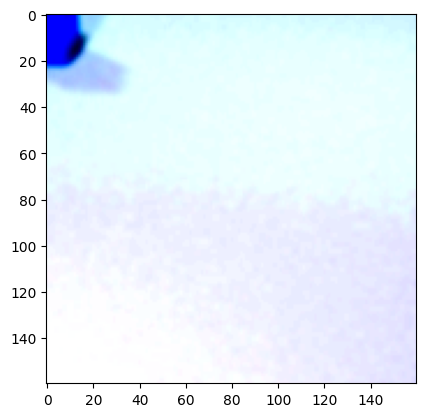

In [187]:
plt.imshow( transformed_image1.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


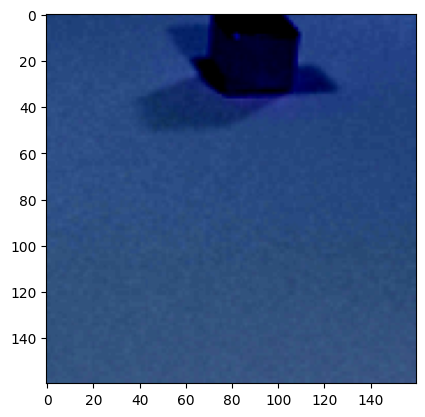

In [188]:
plt.imshow( transformed_image0.permute(1, 2, 0))

In [21]:
from PIL import Image
from lightly.transforms.simclr_transform import SimCLRTransform
import matplotlib.pyplot as plt
img = Image.open('../../dataset/unlabeled/video_2001/image_5.png').convert("RGB")

In [22]:
img.size

(240, 160)

In [23]:
# DATA_MEAN = [0.485, 0.456, 0.406]
# DATA_STD = [0.229, 0.224, 0.225]
# transform_train = transforms.Compose([
#         transforms.RandomResizedCrop(args.img_size),
#         # transforms.RandomHorizontalFlip(),
#         # transforms.RandomVerticalFlip(),
#         # transforms.RandomRotation(180),
#         # transforms.RandomInvert(),
#         transforms.RandomAdjustSharpness(sharpness_factor=2),
#         # transforms.ColorJitter(
#         #     brightness=0.4,
#         #     contrast=0.4,
#         #     saturation=0.4,
#         # ),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=torch.tensor(DATA_MEAN), std=torch.tensor(DATA_STD)),
#     ])
trans = SimCLRTransform(input_size=(160,240), min_scale=0.2)

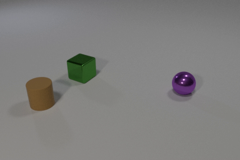

In [24]:
img

In [25]:
from torchvision import datasets, transforms
transforms.ToTensor()(img).shape

torch.Size([3, 160, 240])

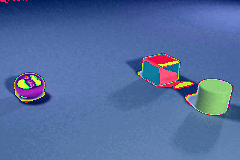

In [26]:
a,b = trans(img)
a = transforms.ToPILImage()(a)
a

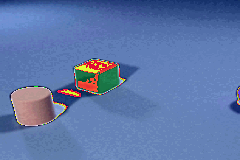

In [27]:
b = transforms.ToPILImage()(b)
b